# 1 Trucos para entrenar redes neuronales

## 1.1 Tasa de aprendizaje

La clase pasada entrenamos una red neuronal usando el optimizador SGD y el optimizador Adam.

1. Implemente las siguientes funciones para computar la precisión y la pérdida sobre los datos de entrenamiento y
validación (Note que debe completar la definición de la función y comentar donde se indica).

In [70]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

def precision(prueba=True):
  loader = test_loader if prueba else train_loader
  total=0
  correct=0
  with torch.no_grad():
    for xi, yi in loader:
      xi = xi.reshape(-1, 28*28).to(device)
      yi = yi.to(device)
      output = model(xi)
      _, predicted = torch.max(output.data, 1)
      total += yi.size(0)
      correct += (predicted == yi).sum().item()
  return correct/total

def perdida(prueba=True):
  trainset_loss = 0.0
  loader = test_loader if prueba else train_loader
  with torch.no_grad():
    for xi, yi in loader:
      xi = xi.reshape(-1, 28*28).to(device)
      yi = yi.to(device)
      output = model(xi)
      loss = loss_function(output, yi)

    batch_loss = loss.item() * yi.size(0)
    trainset_loss += batch_loss
  return trainset_loss

2. Entrene una red neuronal profunda con dos capas escondidas (de 200 y 60 unidades) y activaciones nn.ReLU. Optimice utilizando Adam con una una tasa de aprendizaje lr=0.001. Al entrenar grafique la pérdida y el error de precisión.

Primero definimos el modelo correspondiente

In [2]:
class NNh2_relu(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NNh2_relu, self).__init__()

        hidden_size1, hidden_size2  = 200, 60

        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.relu(self.fc3(out))
        return out

In [6]:
device = torch.device('cuda'if torch.cuda.is_available() else'cpu')

input_size = 784 # Dimension de datos de entrada (28 x 28)
num_classes = 10 # MNIST tiene 10 clases (numeros del 1 al 10)
num_epochs = 10 # Numero de epocas para entrenar
bs = 100 # Tamano de lote (batch_size)

lr = 0.001 # Tasa de aprendizaje


Primero cargamos los datos

In [ ]:
root ='./datos'# Carpeta donde se guardaran los datos
train_data = MNIST(root, train=True, transform=ToTensor(), download=True)
test_data  = MNIST(root, train=False, transform=ToTensor())

train_loader = DataLoader(train_data, batch_size=bs, shuffle=True)
test_loader  = DataLoader(test_data,  batch_size=bs, shuffle=False)

Ahora entrenaremos el modelo y calculamos la pérdida y presición con los datos de prueba.

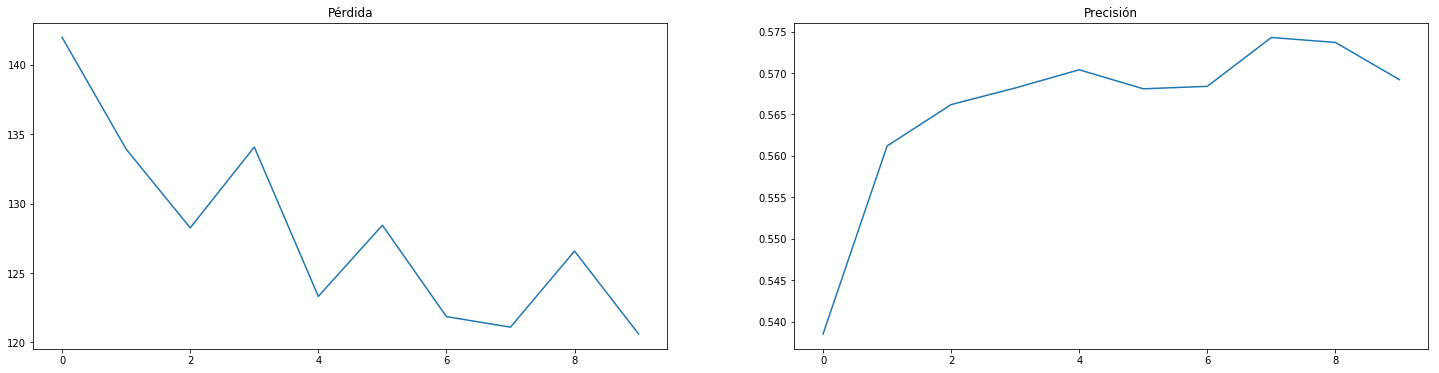

In [72]:
model = NNh2_relu(input_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

perdida_mod = []
precision_mod = []
for epoch in range(num_epochs):
  
  for i, (xi, yi) in enumerate(train_loader):

    # Las entradas de la imagen se convierten en vectores
    xi = xi.reshape(-1, 28*28).to(device)# imagenes
    yi = yi.to(device)# etiquetas

    # Propagacion para adelante
    output = model(xi)
    loss = loss_function(output, yi)
    # Propagcion para atras y paso de optimizacion

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #perdida_mod.append(loss.item())   
    #if (i+1) % 100 == 0: 
    #  print ('Epoca: {}/{}, Paso: {}/{}, Perdida: {:.5f}'.format(epoch+1,num_epochs, i+1, len(train_loader), loss.item()))
  
  perdida_mod.append(perdida())
  precision_mod.append(precision())


plt.subplot(1,2,1)
plt.plot(perdida_mod)
plt.title('Pérdida')
plt.subplot(1,2,2)
plt.plot(precision_mod)
plt.title('Precisión')
plt.show()

3. Repita el experimento usando lr=0.01 y lr=0.1. Comente acerca del cambio entre estas tres curvas y el número
de épocas requerido para llegar a algún valor en la pérdida/precisión.

Primero usamos lr = 0.01

In [74]:
lr = 0.01 # Tasa de aprendizaje

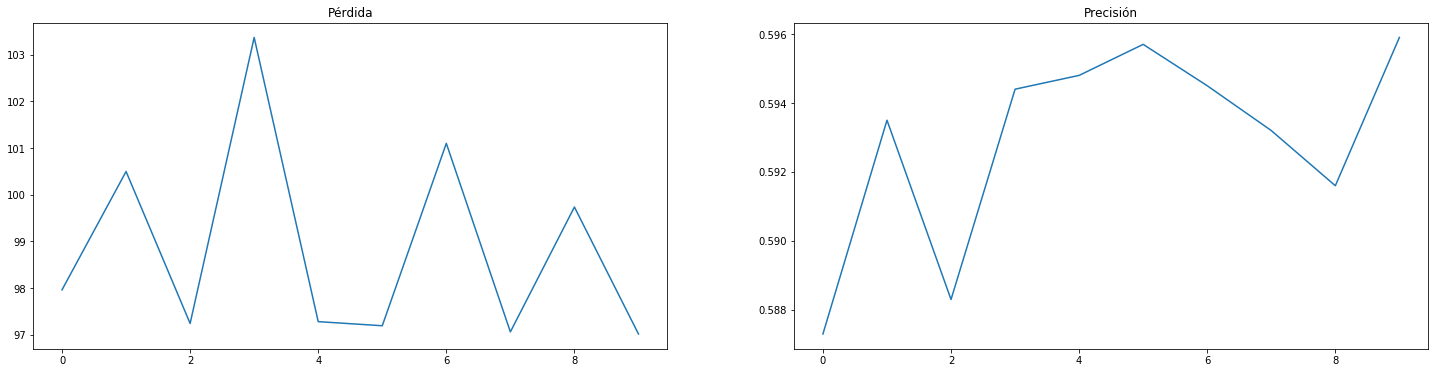

In [75]:
model = NNh2_relu(input_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

perdida_mod = []
precision_mod = []
for epoch in range(num_epochs):
  
  for i, (xi, yi) in enumerate(train_loader):

    # Las entradas de la imagen se convierten en vectores
    xi = xi.reshape(-1, 28*28).to(device)# imagenes
    yi = yi.to(device)# etiquetas

    # Propagacion para adelante
    output = model(xi)
    loss = loss_function(output, yi)
    # Propagcion para atras y paso de optimizacion

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #perdida_mod.append(loss.item())   
    #if (i+1) % 100 == 0: 
    #  print ('Epoca: {}/{}, Paso: {}/{}, Perdida: {:.5f}'.format(epoch+1,num_epochs, i+1, len(train_loader), loss.item()))
  
  perdida_mod.append(perdida())
  precision_mod.append(precision())


plt.subplot(1,2,1)
plt.plot(perdida_mod)
plt.title('Pérdida')
plt.subplot(1,2,2)
plt.plot(precision_mod)
plt.title('Precisión')
plt.show()

Ahora usamos lr=0.1

In [76]:
lr = 0.1 # Tasa de aprendizaje

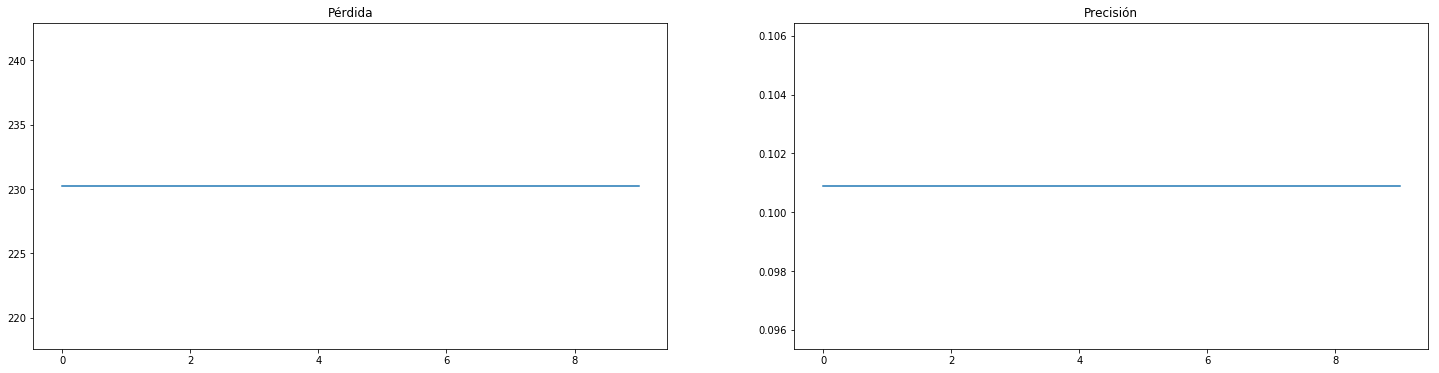

In [77]:
model = NNh2_relu(input_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

perdida_mod = []
precision_mod = []
for epoch in range(num_epochs):
  
  for i, (xi, yi) in enumerate(train_loader):

    # Las entradas de la imagen se convierten en vectores
    xi = xi.reshape(-1, 28*28).to(device)# imagenes
    yi = yi.to(device)# etiquetas

    # Propagacion para adelante
    output = model(xi)
    loss = loss_function(output, yi)
    # Propagcion para atras y paso de optimizacion

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #perdida_mod.append(loss.item())   
    #if (i+1) % 100 == 0: 
    #  print ('Epoca: {}/{}, Paso: {}/{}, Perdida: {:.5f}'.format(epoch+1,num_epochs, i+1, len(train_loader), loss.item()))
  
  perdida_mod.append(perdida())
  precision_mod.append(precision())


plt.subplot(1,2,1)
plt.plot(perdida_mod)
plt.title('Pérdida')
plt.subplot(1,2,2)
plt.plot(precision_mod)
plt.title('Precisión')
plt.show()

4. Cuando las curvas de pérdida y error son ruidosas o brincan mucho quiere decir la optimización es demasiado rápida (la tasa de aprendizaje es alta). Un truco para mejorar el aprendizaje es empezar con una tasa de aprendizaje alta lr_init y bajarla gradualmente. Una estrategia para hacer esto es ajustando la magnitud de lr_init exponencialmente en cada época. Por ejemplo, por medio de la siguiente función.

In [78]:
def lr_ajuste(epoca, lr_init, gamma):
    return lr_init * math.pow(gamma, epoca)

Implementamos ExponentialLR en el modelo

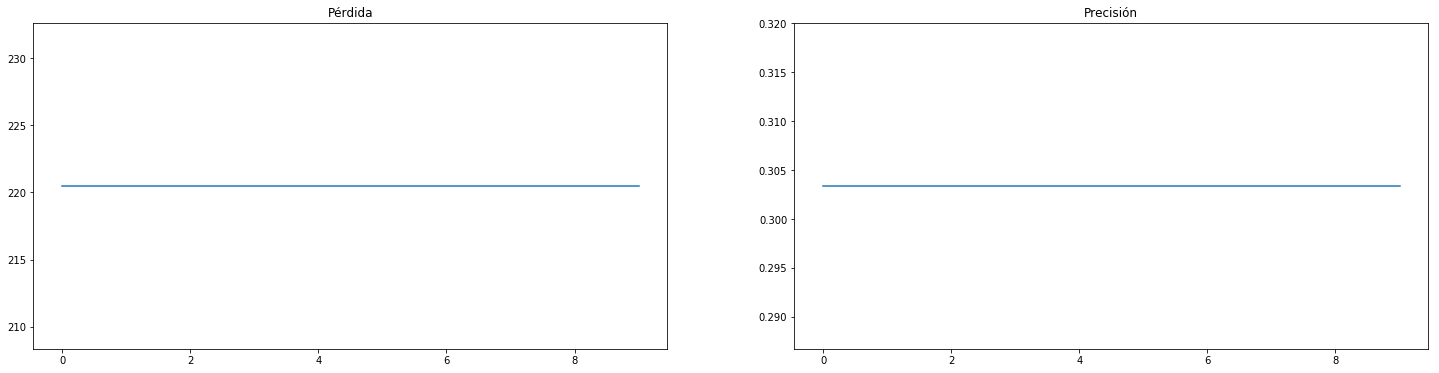

In [82]:
model = NNh2_relu(input_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.1,-1)

perdida_mod = []
precision_mod = []
for epoch in range(num_epochs):
  
  for i, (xi, yi) in enumerate(train_loader):

    # Las entradas de la imagen se convierten en vectores
    xi = xi.reshape(-1, 28*28).to(device)# imagenes
    yi = yi.to(device)# etiquetas

    # Propagacion para adelante
    output = model(xi)
    loss = loss_function(output, yi)
    # Propagcion para atras y paso de optimizacion

    optimizer.zero_grad()
    scheduler.step()
    loss.backward()
    optimizer.step()

    #perdida_mod.append(loss.item())   
    #if (i+1) % 100 == 0: 
    #  print ('Epoca: {}/{}, Paso: {}/{}, Perdida: {:.5f}'.format(epoch+1,num_epochs, i+1, len(train_loader), loss.item()))
  
  perdida_mod.append(perdida())
  precision_mod.append(precision())
  

plt.subplot(1,2,1)
plt.plot(perdida_mod)
plt.title('Pérdida')
plt.subplot(1,2,2)
plt.plot(precision_mod)
plt.title('Precisión')
plt.show()